In [118]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import numpy as np
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from math import ceil
%matplotlib notebook

Site = 'FishIsland'
Site = 'Illisarvik'
Data_Path = 'C:/Users/wesle/NetworkAnalysis/'+Site+'/'#'Data_Footprints_2018-06-12.csv'
Data = pd.read_csv(Data_Path+'ECData.csv')
Data = Data.set_index(pd.DatetimeIndex(Data.datetime))
Data = Data.drop('datetime',axis=1)
# print(Data['PPFD_Avg'])

# Data = Data.interpolate().bfill()
# Data = Data.interpolate().ffill()

Data['fch4']*=1000
aliases={'wind_speed':'$\overline{U}$','PPFD_Avg':'PPFD',
        'AirTC_Avg':'T$_{a}$','Out_of_Basin':'F$_{out}$',
        'Sedge':'F$_{sdg}$','air_pressure':'P$_{a}$',
        'Shrub':'F$_{shb}$','Sparse':'F$_{spr}$','Grass':'F$_{grs}$'
         ,'Temp':'T$_{s}$','H':'$H$','VPD':'$VPD$','VWC':'$VWC$',
        'Water Table': 'W$_{TBL}$','Active Layer':'AL',
        'Wind Spd':'$\overline{U}$','24H Rain':'24HR','Wtr Tbl Trnd':'d Wtr Tbl',
        'air pressure':'P$_{a}$','Ta':'T$_{a}$','Rn':'Rn','PPFD':'PPFD','Rain':'Rain',
        'Ts 2.5 cm':'T$_{2.5cm}$','Ts 15 cm':'T$_{15cm}$'}
def Read(Data_Path,var,aliases):
    Filling_Path = Data_Path+var+'/GapFilled.csv'
    Filling = pd.read_csv(Filling_Path)
    Filling = Filling.set_index(pd.DatetimeIndex(Filling.datetime))
    Summary_Path = Data_Path+var+'/GapFillingSummary.csv'
    Runs = pd.read_csv(Summary_Path).drop('Unnamed: 0',axis=1)
    print(Runs.head())
    Runs['Name']=''
    Runs['Foundation']=''
    Group = Runs.groupby('Key').agg({'Model': 'first', 'Foundation': 'first','Name': 'first', 
                                    'Level': 'first','MSE': 'mean', 'R2': 'mean'})
    Group['SE'] = Runs[['Key','MSE']].groupby('Key').sem()
    Group = Group.reset_index()
#     print(Group['MSE'].sem())
#     Group['SE'] = Runs[['Key','MSE']].groupby('Key').sem()
    Runs.loc[Runs['Level']==0,'Best'] = 'Best'    
    Levels = Group.groupby('Level').min()
    Sub=Group[Group['MSE'].isin(Levels['MSE'].values)]
    Sub.sort_values('Level',inplace=True)
    Sub = Sub.loc[Sub['Level']>=1]
    for level in Sub['Level']:
        if level != 1:
            a  = Sub.loc[Sub['Level']==level-1,'Model'].values[0].split('+')
            for i,row in Group.loc[Group['Level']==level].iterrows():
#                 try:
                b = row['Model'].split('+')
#                 print(a,b,level,[c for c in b if c not in a][0])
                Group.loc[((Group['Model'] == row['Model']) & (Group['Level']==level)),'Name']\
                = aliases[[c for c in b if c not in a][0]]
                Group.loc[Group['Level']==level,'Foundation']=Sub.loc[Sub['Level']==level-1,'Model'].values[0]
#                 except:
#                     print(row['Model'])
#                     Group.loc[Group['Model']==row['Model'],'Name']=row['Model']
#                     pass
        else:
            for i,row in Group.loc[Group['Level']==level].iterrows():
                Group.loc[Group['Model']==row['Model'],'Name']=aliases[row['Model']]
    
    return(Filling,Runs,Group)
fco2_fill,fco2_Runs,fco2_summary = Read(Data_Path,'fco2',aliases)
fch4_fill,fch4_Runs,fch4_summary = Read(Data_Path,'fch4',aliases)



Colors ={}
Colors['fco2']=[0,1,0]
Colors['fch4']=[1,0,0]
    
sizes = (6.5,6.5)
# print(Data)
# print(fco2_summary.loc[])

    Key  Level       MSE  \
0  13_0  13     0.846749   
1  13_0  13     1.268813   
2  13_0  13     0.682632   
3  13_0  13     0.619276   
4  13_0  13     0.900048   

                                                                                             Model  \
0  H+wind_speed+air_pressure+PPFD_Avg+AirTC_Avg+VPD+Temp+VWC+Sedge+Shrub+Grass+Sparse+Out_of_Basin   
1  H+wind_speed+air_pressure+PPFD_Avg+AirTC_Avg+VPD+Temp+VWC+Sedge+Shrub+Grass+Sparse+Out_of_Basin   
2  H+wind_speed+air_pressure+PPFD_Avg+AirTC_Avg+VPD+Temp+VWC+Sedge+Shrub+Grass+Sparse+Out_of_Basin   
3  H+wind_speed+air_pressure+PPFD_Avg+AirTC_Avg+VPD+Temp+VWC+Sedge+Shrub+Grass+Sparse+Out_of_Basin   
4  H+wind_speed+air_pressure+PPFD_Avg+AirTC_Avg+VPD+Temp+VWC+Sedge+Shrub+Grass+Sparse+Out_of_Basin   

         R2  
0  0.892558  
1  0.868960  
2  0.928883  
3  0.933785  
4  0.874577  


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


    Key  Level        MSE  \
0  13_0  13     27.648497   
1  13_0  13     42.246045   
2  13_0  13     27.015817   
3  13_0  13     20.416327   
4  13_0  13     29.354287   

                                                                                             Model  \
0  H+wind_speed+air_pressure+PPFD_Avg+AirTC_Avg+VPD+Temp+VWC+Sedge+Shrub+Grass+Sparse+Out_of_Basin   
1  H+wind_speed+air_pressure+PPFD_Avg+AirTC_Avg+VPD+Temp+VWC+Sedge+Shrub+Grass+Sparse+Out_of_Basin   
2  H+wind_speed+air_pressure+PPFD_Avg+AirTC_Avg+VPD+Temp+VWC+Sedge+Shrub+Grass+Sparse+Out_of_Basin   
3  H+wind_speed+air_pressure+PPFD_Avg+AirTC_Avg+VPD+Temp+VWC+Sedge+Shrub+Grass+Sparse+Out_of_Basin   
4  H+wind_speed+air_pressure+PPFD_Avg+AirTC_Avg+VPD+Temp+VWC+Sedge+Shrub+Grass+Sparse+Out_of_Basin   

         R2  
0  0.772790  
1  0.293462  
2  0.690578  
3  0.785486  
4  0.745762  


# Best performer at each factor level

<IPython.core.display.Javascript object>


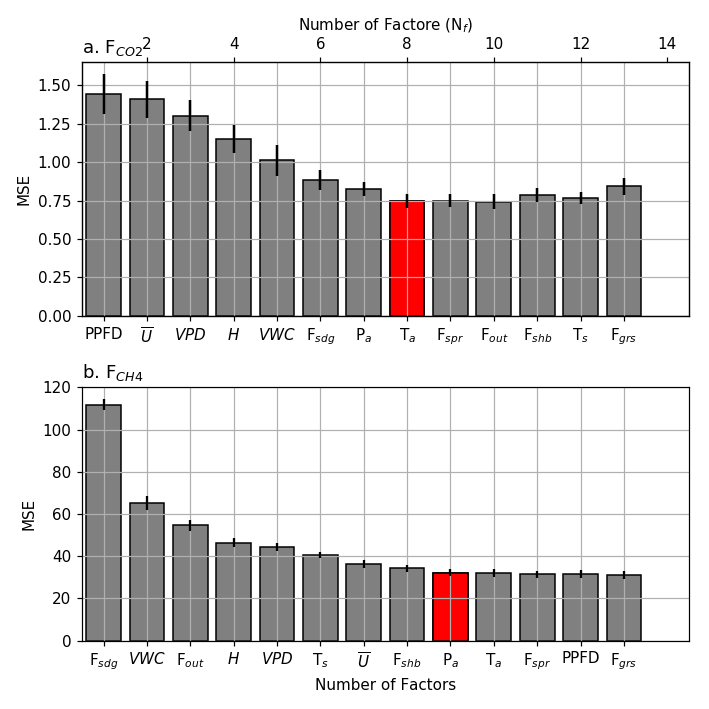

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


['H', 'wind_speed', 'air_pressure', 'PPFD_Avg', 'AirTC_Avg', 'VPD', 'VWC', 'Sedge']
['H', 'wind_speed', 'air_pressure', 'VPD', 'Temp', 'VWC', 'Sedge', 'Shrub', 'Out_of_Basin']


In [122]:
fig,ax = plt.subplots(2,1,figsize=sizes)
def Bars(ax,Summary,title,Score):
    if Score == 'MSE':
        Levels = Summary.groupby('Level').min()
    else:
        Levels = Summary.groupby('Level').max()
    Sub=Summary[Summary[Score].isin(Levels[Score].values)]#[['Model',
#                                     'STD',Score,'CI','Level','SE']]
    Sub.sort_values('Level',inplace=True)
    Sub = Sub.loc[Sub['Level']>=1]
    Sub.reset_index(inplace=True,drop=True)
        
    ax.bar(Sub['Level'],Sub[Score],yerr = Sub['SE'],facecolor='grey',edgecolor='black')
    ax.set_ylabel('MSE')
  
    MinMod = Sub[Sub[Score] == Sub[Score].min()]
    Sub['Sig']=False
    # ID'd using 1SE rule
#     print(Summary)
    Parsimony = Sub.loc[Sub['Model']==Summary.loc[Summary['Level']==0,'Model'].values[0]]
    ax.bar(Parsimony['Level'],Parsimony[Score],facecolor='red',edgecolor='black')
    if title == 'a. F$_{CO2}$':
        yaxy = ax.twiny()
        yaxy.bar(Sub['Level'],Sub[Score],yerr = Sub['SE'],facecolor='None',edgecolor='None')
        yaxy.bar(Parsimony['Level'],Parsimony[Score],facecolor='None',edgecolor='None')
        yaxy.set_xlim(.5,14.5)
        yaxy.set_xlabel('Number of Factore (N$_f$)')
    plt.sca(ax)
    plt.xticks(Sub['Level'].values,Sub['Name'].values)
    ax.set_title(title,loc='left')
    ax.set_xlim(.5,14.5)
    ax.grid()
    print(Parsimony['Model'].values[0].split('+'))
    
# plt.suptitle('Best Performing Models')
ax[1].set_xlabel('Number of Factors')
Bars(ax[0],fco2_summary,'a. F$_{CO2}$',Score='MSE')
Bars(ax[1],fch4_summary,'b. F$_{CH4}$',Score='MSE')
plt.tight_layout()#rect=[0, 0.0, 1, 0.97])
plt.savefig('Fig3.png')
# Sub
# print(fco2_summary)
# print(fch4_summary)

# Performance at Level 1

<IPython.core.display.Javascript object>


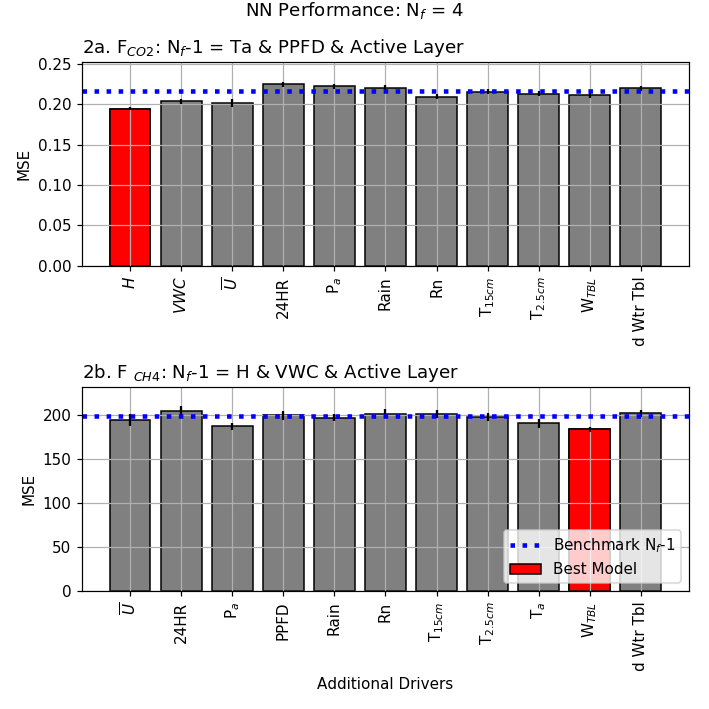

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [90]:
fig,ax = plt.subplots(2,1,figsize=sizes)
def Level_Plot(ax,l,Summary,title,yl,Score='MSE'):
    Sub = Summary.loc[Summary['Level']==l]
    if l == 1:
        ax.bar(Sub['Name'],Sub[Score],yerr=Sub['SE'],facecolor='grey',edgecolor='black')
    else:
        ax.bar(Sub['Name'],Sub[Score],yerr=Sub['SE'],facecolor='grey',edgecolor='black')
#     print(Sub[['Name',Score,'Model']])
    ax.grid()
    ax.set_ylabel('MSE')
    plt.sca(ax)
    plt.xticks(rotation=90)
    ax.set_ylim(0,yl)
    if Score =='MSE':
        Parsimony = Sub.loc[Sub[Score] == Sub[Score].min()]
    else:
        Parsimony = Sub.loc[Sub[Score] == Sub[Score].max()]
    ax.bar(Parsimony['Name'],Parsimony[Score],facecolor='red',edgecolor='black',label = 'Best Model')
    yl = Sub[Score].max()+Sub['SE'].max()
    ax.set_ylim(0,yl+yl*.1)
    ax.set_title(title,loc='left')
    if l >1:
        y = Summary.loc[Summary['Model']==Parsimony['Foundation'].values[0],Score].values
        xl = ax.get_xlim()
        ax.set_xlim(xl[0],xl[1])
        ax.plot([xl[0],xl[1]],[y,y],linestyle = ':',color = 'blue',linewidth=3,label = 'Benchmark N$_f$-1')
        ax.set_title(title+': N$_f$-1 = '+Sub['Foundation'].values[0].replace('+',' & '),loc='left')
#     print(Sub.loc[Sub[Score]<=(Parsimony[Score].values[0]+Parsimony['SE'].values[0])])
    Sub['T'] = Sub[Score]-(Parsimony[Score].min()+Parsimony['SE'].max())
#     print(Sub['T'])

Fignum = '2'
Level = 4
Level_Plot(ax[0],Level,fco2_summary,Fignum+'a. F$_{CO2}$',1.12,Score ='MSE')
Level_Plot(ax[1],Level,fch4_summary,Fignum+'b. F $_{CH4}$',1.12,Score ='MSE')
plt.sca(ax[0])
plt.suptitle('NN Performance: N$_f$ = '+str(Level),x=.5,y=1)
if Level == 1:
    ax[1].set_xlabel('Drivers')
else:
    ax[1].set_xlabel('Additional Drivers')
ax[1].legend(loc=4)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.0, 1, 0.97])
plt.savefig('Fig'+Fignum+'.png')

<IPython.core.display.Javascript object>


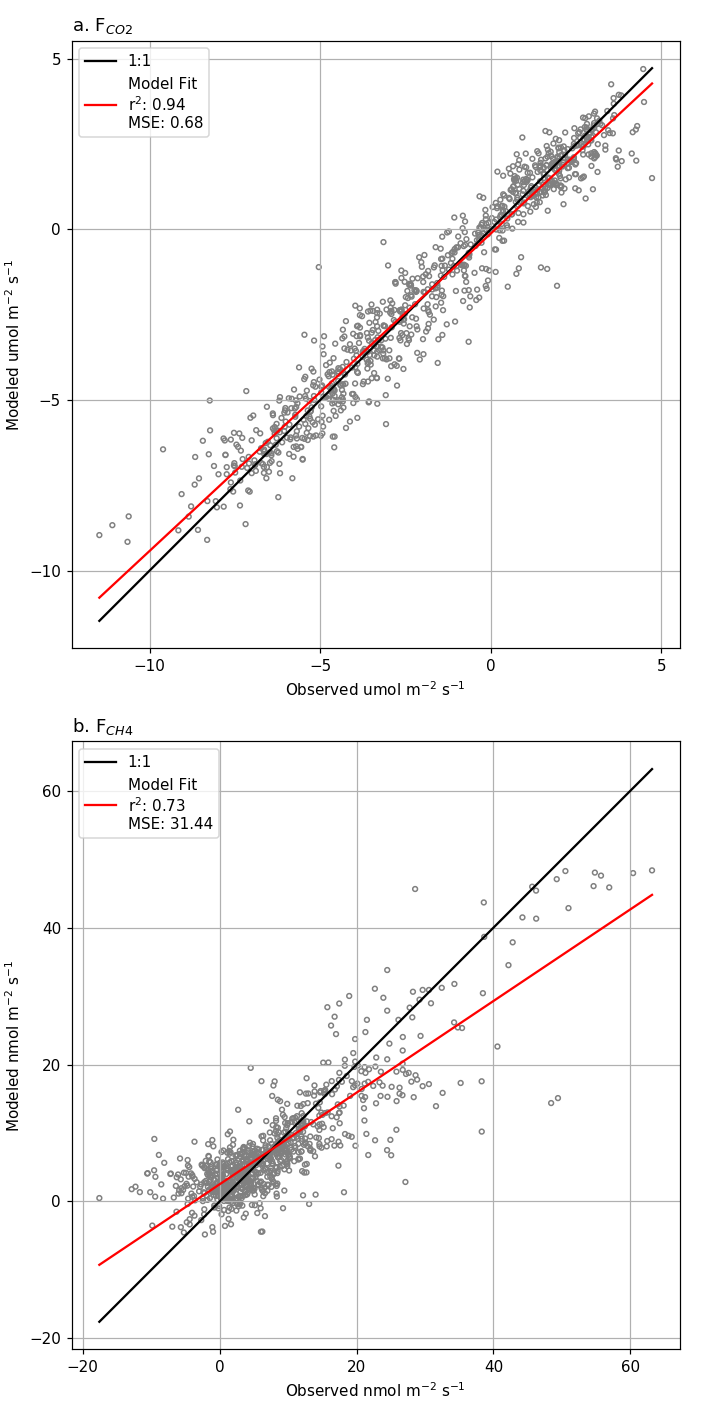

Raw Fco2 Data  -1.7922300038924157
Gap Filled Fco2 Data  -5.865383589118101 g m$^{-2}$ s$^{-1}$

Raw Fch4 Data  11.045109577881995 mg m$^{-2}$ s$^{-1}$ 
Gap Filled Fch4 Data  11.123878012279217 mg m$^{-2}$ s$^{-1}$

C Ballance =  -5.553915004774291 umol m$^{-2}$ s$^{-1}$
+- 0.6514905357920795 umol m$^{-2}$ s$^{-1}$


<IPython.core.display.Javascript object>


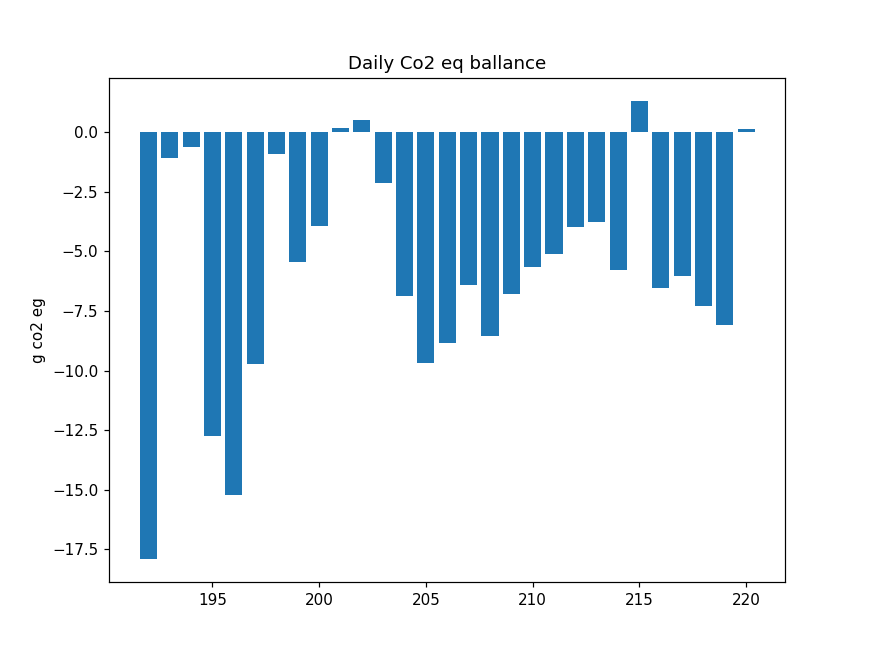

Text(0,0.5,'g co2 eg')

In [110]:

def Full(summary,Data,Fill,var,ax,title):
    ax.locator_params(nbins=5)
    ax.set(aspect='equal')
    if var == 'fch4':
        Units = 'nmol m$^{-2}$ s$^{-1}$'
    else:
        Units = 'umol m$^{-2}$ s$^{-1}$'
    mod = summary.loc[summary['Level']==0,'Model'].values[0]
#     print(summary.loc[summary['Level']==0])
    Data['Fill']=Fill['BestModel: '+mod]
    Temp = Data[[var,'Fill']].dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(Temp[var],Temp['Fill'])
    MSE = metrics.mean_squared_error(Temp[var],Temp['Fill'])
#     print(intercept,slope)
    ax.scatter(Temp[var],Temp['Fill'],facecolor='None',edgecolor='grey',marker='o',label=None,s=10)
    Line = np.linspace(Temp[var].min(),Temp[var].max(),10)
    ax.plot(Line,Line,color='black',label = '1:1')
    ax.plot(Line,Line*slope+intercept,color='red',label = 'Model Fit\nr$^2$: '+str(np.round(r_value**2,2))\
                                                              +'\nMSE: '+str(np.round(MSE,2)))
    ax.grid()
    ax.legend()
    ax.set_title(title,loc='left')
    ax.set_ylabel('Modeled '+ Units)
    ax.set_xlabel('Observed '+ Units)
    if var == 'fco2':
        Data[var+'_Fill']=Data[var].fillna(Data['Fill'])* 1e-6 * 44.0095 *3600*24
        Data['fill'] = Data['Fill']
    else:
        Data[var+'_Fill']=Data[var].fillna(Data['Fill'])* 1e-9 * 16.04246 *3600*24
        
    return(Data)
    
fig,ax=plt.subplots(2,1,figsize=(3.25*2,6.5*2))
Data = Full(fco2_summary,Data,fco2_fill,'fco2',ax[0],'a. F$_{CO2}$')
Data = Full(fch4_summary,Data,fch4_fill,'fch4',ax[1],'b. F$_{CH4}$')
plt.tight_layout()

Data['Cbal'] = (Data['fco2_Fill']+Data['fch4_Fill']*28)

print('Raw Fco2 Data ',Data['fco2'].mean()* 1e-6 * 44.0095 *3600*24,'g m$^{-2}$ s$^{-1}$')
print('Gap Filled Fco2 Data ',Data['fco2_Fill'].mean(),'g m$^{-2}$ s$^{-1}$')
print()
print('Raw Fch4 Data ',Data['fch4'].mean()* 1e-6 * 16.04246 *3600*24,'mg m$^{-2}$ s$^{-1}$ ')
print('Gap Filled Fch4 Data ',Data['fch4_Fill'].mean()*1e3,'mg m$^{-2}$ s$^{-1}$' )

print()
print('C Ballance = ',Data['Cbal'].mean(),'umol m$^{-2}$ s$^{-1}$')
print('+-',Data['Cbal'].sem()*1.96,'umol m$^{-2}$ s$^{-1}$')
Daily = Data.groupby(Data.index.dayofyear).mean()
plt.figure(figsize = (8,6))
plt.bar(Daily.index,Daily['Cbal'])
plt.title('Daily Co2 eq ballance')
plt.ylabel('g co2 eg')

<IPython.core.display.Javascript object>


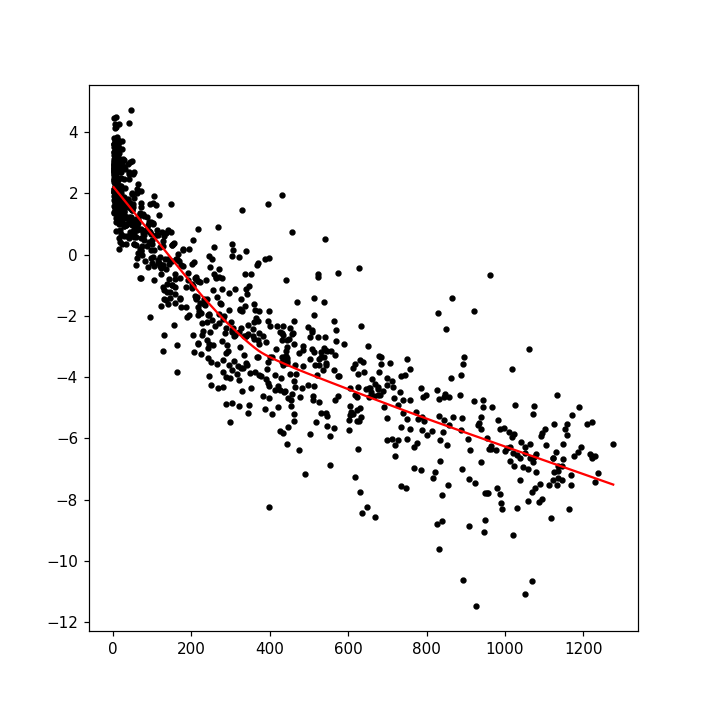

2.233420930063671 -0.0155935763394094


<IPython.core.display.Javascript object>


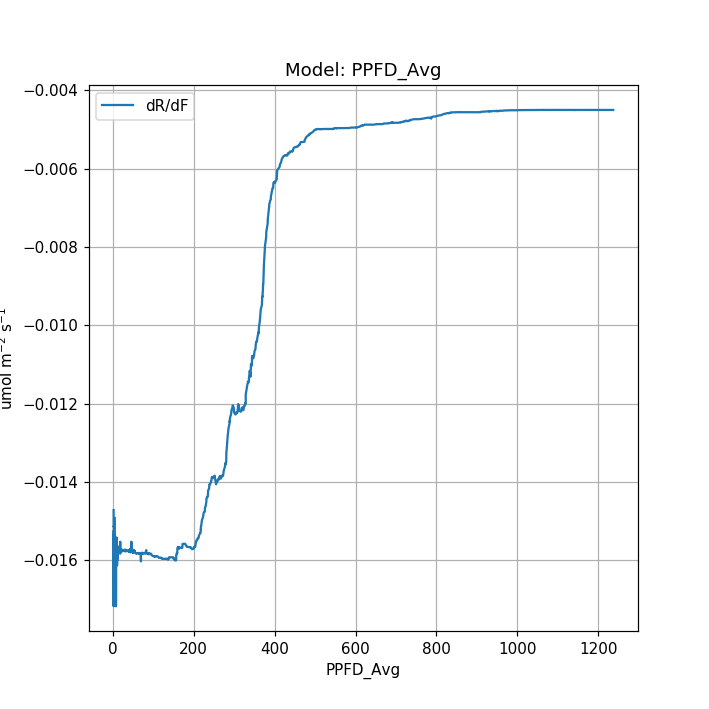

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


In [111]:
import scipy.fftpack as fftpack
def F1(model,Data,Fill,var,Factor=None):
    Model = 'Model: '+model
    Data['Fill']=Fill[Model] 
    if var == 'fch4':
        Units = 'nmol m$^{-2}$ s$^{-1}$'
    else:
        Units = 'umol m$^{-2}$ s$^{-1}$'
    plt.figure(figsize=sizes)
    Test = Data[[var,'Fill']].dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(Test[var],Test['Fill'])
# if Factor2 == None:
    if Factor == None:
        Factor = model
        Temp = Data[[Factor,'Fill']].sort_values(Factor).dropna(axis=0)
#         Temp['Fill']
        plt.scatter(Data[Factor],Data[var],label = 'Observations',s=10,c='black')
        plt.plot(Temp[Factor],Temp['Fill'],label = 'Modeled Flux\n'+\
                 'r${^2}$:'+str(np.round(r_value**2,2))+\
                '\nMSE: '+str(np.round(metrics.mean_squared_error(Test[var],Test['Fill']),2))+' '+Units,c='red')
        Temp3 = (Data.loc[Data[Factor]<=10])
        slope, intercept, r_value, p_value, std_err = stats.linregress(Temp3[Factor],Temp3['Fill'])
        print(intercept,slope)
#         print(Temp)
#         Temp = Temp.drop_duplicates(subset='PPFD_Avg')
        plt.figure(figsize=sizes)
        Temp['dR/dF'] = np.nan
        Temp['dR/dF'][:-1] = np.diff(Temp['Fill'])/np.diff(Temp[Factor])
        
        Temp[Temp['dR/dF']==0]=np.nan
        plt.plot(Temp[Factor][:-1],Temp['dR/dF'][:-1])
#         print(Temp.loc[Temp['PPFD']>4.65])
        
    else:
        plt.scatter(Data[Factor[0]],Data[var],label = 'Observations',s=10,c='black')
        if len(Factor)>1:
            plt.scatter(Data[Factor[0]],Data['Fill'],c=Data[Factor[1]],
                cmap = plt.get_cmap('RdBu'),label = 'Modeled Flux\n'+'r${^2}$:'+str(np.round(r_value**2,2))+\
                '\nMSE: '+str(np.round(metrics.mean_squared_error(Test[var],Test['Fill']),2))+' '+Units)
            plt.colorbar()
        else:
            plt.scatter(Data[Factor[0]],Data['Fill'],c='red',s=10,
                label = 'Modeled Flux\n'+'r${^2}$:'+str(np.round(r_value**2,2))+\
                '\nMSE: '+str(np.round(metrics.mean_squared_error(Test[var],Test['Fill']),2))+' '+Units)
            
        
    plt.title(Model)
    plt.ylabel(Units)
    plt.xlabel(Factor)
    plt.grid()
    plt.legend()
    Fignum='3'
    plt.savefig('Fig'+Fignum+'.png')
# F1('PPFD_Avg',Data,fco2_fill,'fco2')
if Site == 'FishIsland':
    Model = 'PPFD'
else:
    Model = 'PPFD_Avg'
F1(Model,Data,fco2_fill,'fco2')#,['PPFD_Avg','wind_speed'])
# Model = fch4_summary.loc[fch4_summary['Key']=='7_1','Model']
# Model = 'PPFD_Avg+AirTC_Avg+Sedge+VWC+Grass'
# F1(Model,Data,fco2_fill,'fco2',['PPFD_Avg'])
# print(fch4_fill.head())

## Factor Effects

<IPython.core.display.Javascript object>


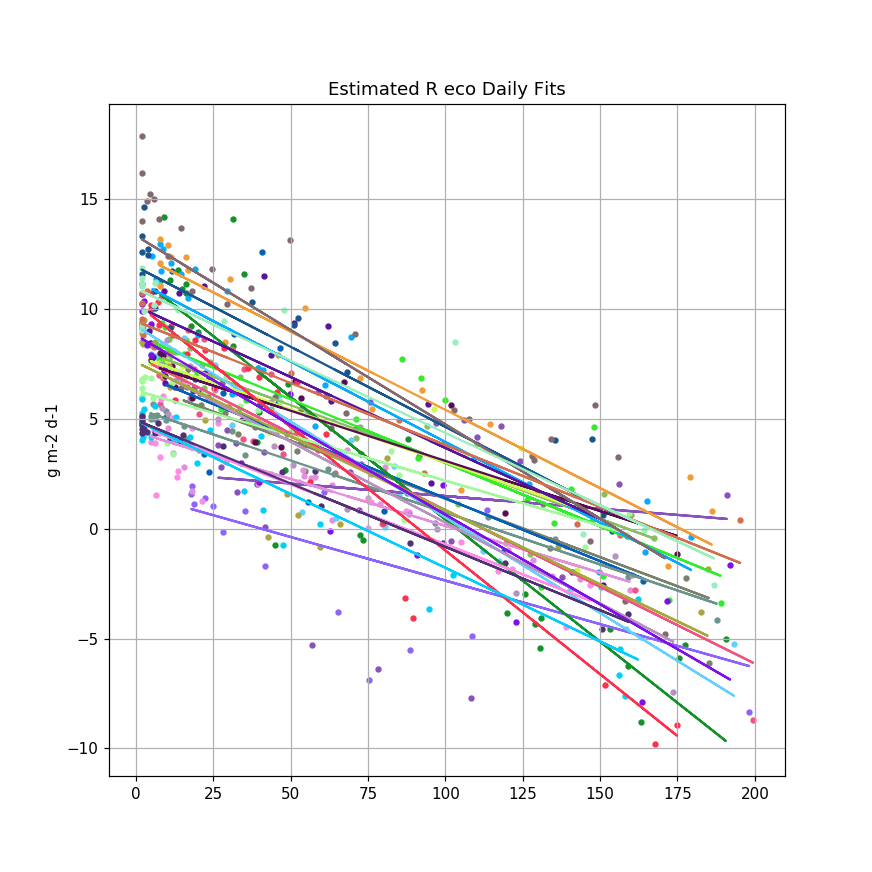

C:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


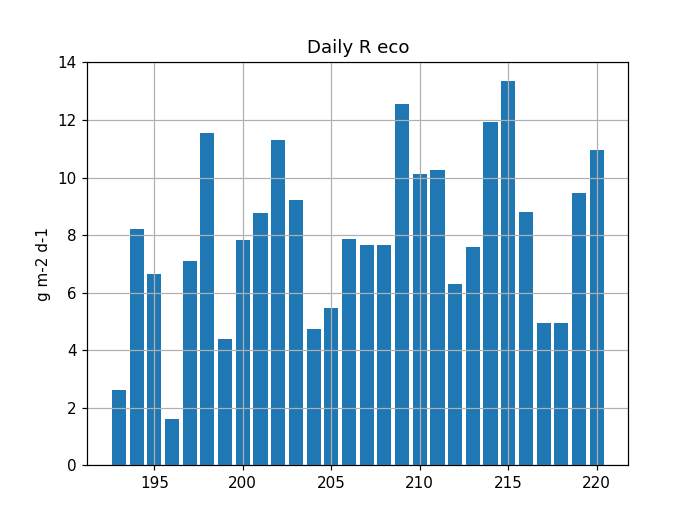

Mean R eco  7.996069101769625


In [115]:
import datetime
from scipy.optimize import curve_fit
# print(Data)
Data['OffsetTime'] = (Data.index + datetime.timedelta(hours=0)).dayofyear
def Curve(x,a,b,c):
    return (b*x+c)
Daily = []
Day = []
factor = []
Factor ='PPFD_Avg'
thresh = 8
fig,ax = plt.subplots(figsize=(8,8))
var = 'AirTC_Avg'

for day in (Data['OffsetTime'].unique()):
    Temp = Data.loc[(Data['OffsetTime']==day)&(Data[Factor]<=200),[Factor,var,'fill']]
#     print(Temp)#,c='black')
    Temp = Temp.dropna()
    if Temp.shape[0]>=int(thresh):
        C=np.random.rand(3)
        popt, pcov = curve_fit(Curve, Temp[Factor].values, Temp['fill'].values)
        ax.plot(Temp[Factor],Curve(Temp[Factor].values,*popt)* 1e-6 * 44.0095 *3600*24,c=C)
        ax.scatter(Temp[Factor],Temp['fill']* 1e-6 * 44.0095 *3600*24,s=10,c=C,
                label = 'Mean R = '+str(np.round(Curve(0,*popt),2)))
        Daily.append(Curve(0,*popt))
        Day.append(day)
    else:
        Daily.append(np.nan)
        Day.append(day)
    factor.append(Temp[var].median())
# plt.ylim(0,4.5)
# plt.xlim(-10,100)
Day = np.asanyarray(Day)
Daily = np.asanyarray(Daily)
# plt.legend()
plt.title('Estimated R eco Daily Fits')
plt.ylabel('g m-2 d-1')
plt.grid()

plt.show()
fig,ax = plt.subplots()
ax.bar(Day,Daily* 1e-6 * 44.0095 *3600*24)
plt.title('Daily R eco')
plt.ylabel('g m-2 d-1')

print('Mean R eco ',np.nanmean(Daily)* 1e-6 * 44.0095 *3600*24)
plt.grid()
# plt.figure()
# plt.scatter(Data['PPFD_Avg'],Data['fill'])

In [ ]:
# print(Data['Day'])

# Individual Model Performance